In [1]:
from dateutil import parser

In [2]:
MAX_BITSWAP_TIMEOUT = 15000 # 15 seconds

In [31]:
# files

data_folder = "data"
plots_folder = "plots"
logs_file = "packets.log"
bitswap_file = "bitswap.log"


# experiment_20221205  experiment_20221205_packets_20  gatewaycids_10_20221206
experiment = "gatewaycids_10_20221206"

MAX_SAMPLES = 71769

logs_path = data_folder + '/' + experiment + '/' + logs_file
bitswap_path = data_folder + '/' + experiment + '/' + bitswap_file

success_cids_file = "success-cids.txt"

In [4]:
WANT_HAVE_POS = 0
WANT_BLOCK_POS = WANT_HAVE_POS + 1
CANCEL_WANT_POS = WANT_BLOCK_POS + 1
HAVE_POS = CANCEL_WANT_POS + 1
DONT_HAVE_POS = HAVE_POS + 1
BLOCK_POS = DONT_HAVE_POS + 1

MESSAGES = ['WANT_HAVE', 'WANT_BLOCK', 'CANCEL_WANT_BLOCK', 'HAVE', 'DONT_HAVE', 'BLOCK']

In [5]:
f = open(logs_path, 'r')
lines = [l[:-1] if l[-1] == '\n' else l for l in f.readlines()]
f.close()

In [35]:
f = open(success_cids_file, 'r')
line = f.readline()
f.close()

success_cids = line.split(',')[:-1]

In [6]:
slines = lines[:10000]

In [7]:
messages = set()
for l in slines:
    messages.add(l.split(',')[1])

In [8]:
messages
for m in messages:
    if m not in MESSAGES:
        print(m)

In [44]:
reqs = {}
for l in lines:
    sep = l.split(',')
    timestamp = sep[0] #parser.parse(sep[0])
    message = sep[1]
    cid = sep[2]
    peerid = sep[3]

    if cid not in reqs:
        reqs[cid] = {}

    if message not in reqs[cid]:
        reqs[cid][message] = {}

    if peerid not in reqs[cid][message]:
        reqs[cid][message][peerid] = []

    reqs[cid][message][peerid].append(timestamp)

In [11]:
# nb WANT-HAVE
want_have_count = []
for cid in reqs:
    count = 0
    if MESSAGES[WANT_HAVE_POS] in reqs[cid]:
        for peerid in reqs[cid][MESSAGES[WANT_HAVE_POS]]:
            count += len(reqs[cid][MESSAGES[WANT_HAVE_POS]][peerid])
    want_have_count.append(count)

In [12]:
sum(want_have_count)/len(want_have_count)

644.9310344827586

In [45]:
# total number of messages for successful requests
success_count_total = []
success_count_wanthave = []
success_count_wantblock = []
success_count_cancel = []
success_count_sent = []
success_count_received = []
success_count_peerids = []
success_count_have = []
success_count_donthave = []
success_count_block = []

success_dict_block = {}

for cid in success_cids:
    if cid not in reqs:
        continue
    total_acc = 0
    wanthave_acc = 0
    wantblock_acc = 0
    cancel_acc = 0
    have_acc = 0
    donthave_acc = 0
    block_acc = 0
    sent_acc = 0
    received_acc = 0
    peerids_set = set()
    if MESSAGES[BLOCK_POS] in reqs[cid]:
        providers = set()
        for peerid in reqs[cid][MESSAGES[BLOCK_POS]]:
            if peerid != '':
                providers.add(peerid)
        success_dict_block[cid] = providers

        for m in reqs[cid]:
            count = 0
            for peerid in reqs[cid][m]:
                if peerid != '':
                    count += len(reqs[cid][m][peerid])
                    peerids_set.add(peerid)


            # total number of messages sent
            total_acc += count

            if m == MESSAGES[WANT_HAVE_POS]:
                wanthave_acc += count
                sent_acc += count
            elif m == MESSAGES[CANCEL_WANT_POS]:
                cancel_acc += count
                sent_acc += count
            elif m == MESSAGES[WANT_BLOCK_POS]:
                wantblock_acc += count
                sent_acc += count
            elif m == MESSAGES[HAVE_POS]:
                have_acc += count
                received_acc += count
            elif m == MESSAGES[DONT_HAVE_POS]:
                donthave_acc += count
                received_acc += count
            elif m == MESSAGES[BLOCK_POS]:
                block_acc += count
                received_acc += count

    success_count_total.append(total_acc)
    success_count_wanthave.append(wanthave_acc)
    success_count_wantblock.append(wantblock_acc)
    success_count_cancel.append(cancel_acc)
    success_count_peerids.append(len(peerids_set))
    success_count_sent.append(sent_acc)
    success_count_received.append(received_acc)
    success_count_have.append(have_acc)
    success_count_donthave.append(donthave_acc)
    success_count_block.append(block_acc)

In [49]:
for cid in success_dict_block:
    if len(success_dict_block[cid])>2:
        print(success_dict_block[cid])


{'QmQPL5c5SD6JnDV1UrEMEGuqi8HT6dYqZQnpkjQkBdpgdN', 'QmV8QTSkPvFyUG33CRWCgT8f1UmE5e7WhuWMWvcCBMBSq2', 'Qmbut9Ywz9YEDrz8ySBSgWyJk41Uvm2QJPhwDJzJyGFsD6'}
{'12D3KooWKf44xjkFQBWELgZM5L92rCyjCKApqZyNYbbqCuKUrDXY', '12D3KooWKTrwTxkVMEMjEXJLXJrnwGnTPRKtaNBfc9nAxci5mjNB', '12D3KooWAUoQTMEaJGcm1ogF7PqYF4TsEfEymxRrbvpLd6ATRhMF'}
{'12D3KooWGtRcWvihm4hX2gT6bQu3uyjb78rgyQR3hPhkxMwivscY', 'QmV8QTSkPvFyUG33CRWCgT8f1UmE5e7WhuWMWvcCBMBSq2', '12D3KooWGRJo1vLDBtfS8a4cVss2QVqvbCaPgtmwwgpUtW675QRa'}
{'12D3KooWGtRcWvihm4hX2gT6bQu3uyjb78rgyQR3hPhkxMwivscY', '12D3KooWFZmGztVoo2K1BcAoDEUmnp7zWFhaK5LcRHJ8R735T3eY', '12D3KooWRZ1Vj1UYrCdZDKz1sTPW5xSG88Ef7HHaawN14CqPBfWv', '12D3KooWNxUGEN1SzRuwkJdbMDnHEVViXkRQEFCSuHRTdjFvD5uw'}
{'Qmem5U9PRyK8RKzkxWhegR78BSdscEjFsDXiPi6Ae9yKMh', 'QmcvdCqN3YYF9YK33JwaVHRgwXuvsenzCZHjJLnUATNZbH', 'QmU77XVBTrTVGRp9eFJi6nSkGK2c1FBdxER3sKDHmGLuyH', 'QmQ71UbwSsPt7qh9b8E6w1JhnAVW4RRrLzWd1CvwLP4nnp', 'Qme7WRoMQesK9TYJCfdzhNrmgx71zSN6HTj7q4Ub5yq9Zi', 'QmQPL5c5SD6JnDV1UrEMEGuqi8HT6dYqZQnpkjQk

In [40]:
def avg(data):
    return sum(data)/len(data)

def print_avg(data, label):
    print(label, round(avg(data), 2))

In [46]:
print_avg(success_count_total, "Total number of messages per successful request:")
print_avg(success_count_peerids, "Number of solicited peers per successful request:")
print_avg(success_count_sent, "Number of sent packets per successful request:")
print_avg(success_count_received, "Number of received packets per successful request:")
print_avg(success_count_wanthave, "Number of WANT-HAVE sent per successful request:")
print_avg(success_count_wantblock, "Number of WANT-BLOCK sent per successful request:")
print_avg(success_count_cancel, "Number of CANCEL sent per successful request:")
print_avg(success_count_have, "Number of HAVE received per successful request:")
print_avg(success_count_donthave, "Number of DONT-HAVE received per successful request:")
print_avg(success_count_block, "Number of BLOCK received per successful request:")

Total number of messages per successful request: 1719.98
Number of solicited peers per successful request: 853.32
Number of sent packets per successful request: 1714.11
Number of received packets per successful request: 5.87
Number of WANT-HAVE sent per successful request: 856.07
Number of WANT-BLOCK sent per successful request: 8.3
Number of CANCEL sent per successful request: 849.74
Number of HAVE received per successful request: 3.95
Number of DONT-HAVE received per successful request: 0.18
Number of BLOCK received per successful request: 1.74


In [69]:
def print_success_rate(data_success, all_data, label):
    print(label, str(round(100*avg(data_success)/avg(all_data), 2))+"%")

In [71]:
print_success_rate(success_count_have, success_count_wanthave, "Success rate of WANT-HAVE messages (for successful requests):")
print_success_rate(success_count_block, success_count_wantblock, "Success rate of WANT-BLOCK messages (for successful requests):")

Success rate of WANT-HAVE messages (for successful requests): 0.18%
Success rate of WANT-BLOCK messages (for successful requests): 30.87%


In [16]:
# total number of messages for successful requests
failure_count_total = []
failure_count_wanthave = []
failure_count_wantblock = []
failure_count_cancel = []
failure_count_sent = []
failure_count_received = []
failure_count_peerids = []
failure_count_have = []
failure_count_donthave = []
failure_count_block = []

for cid in reqs:
    total_acc = 0
    wanthave_acc = 0
    wantblock_acc = 0
    cancel_acc = 0
    have_acc = 0
    donthave_acc = 0
    block_acc = 0
    sent_acc = 0
    received_acc = 0
    peerids_set = set()
    if MESSAGES[BLOCK_POS] not in reqs[cid]:
        for m in reqs[cid]:
            count = 0
            for peerid in reqs[cid][m]:
                count += len(reqs[cid][m][peerid])
                peerids_set.add(peerid)

            # total number of messages sent
            total_acc += count

            if m == MESSAGES[WANT_HAVE_POS]:
                wanthave_acc += count
                sent_acc += count
            elif m == MESSAGES[CANCEL_WANT_POS]:
                cancel_acc += count
                sent_acc += count
            elif m == MESSAGES[WANT_BLOCK_POS]:
                wantblock_acc += count
                sent_acc += count
            elif m == MESSAGES[HAVE_POS]:
                have_acc += count
                received_acc += count
            elif m == MESSAGES[DONT_HAVE_POS]:
                donthave_acc += count
                received_acc += count
            elif m == MESSAGES[BLOCK_POS]:
                block_acc += count
                received_acc += count

    failure_count_total.append(total_acc)
    failure_count_wanthave.append(wanthave_acc)
    failure_count_wantblock.append(wantblock_acc)
    failure_count_cancel.append(cancel_acc)
    failure_count_peerids.append(len(peerids_set))
    failure_count_sent.append(sent_acc)
    failure_count_received.append(received_acc)
    failure_count_have.append(have_acc)
    failure_count_donthave.append(donthave_acc)
    failure_count_block.append(block_acc)

In [17]:
print("Verify these numbers")
print_avg(failure_count_total, "Total number of messages per failed request:")
print_avg(failure_count_peerids, "Number of solicited peers per failed request:")
print_avg(failure_count_sent, "Number of sent packets per failed request:")
print_avg(failure_count_received, "Number of received packets per failed request:")
print_avg(failure_count_wanthave, "Number of WANT-HAVE sent per failed request:")
print_avg(failure_count_wantblock, "Number of WANT-BLOCK sent per failed request:")
print_avg(failure_count_cancel, "Number of CANCEL sent per failed request:")
print_avg(failure_count_have, "Number of HAVE received per failed request:")
print_avg(failure_count_donthave, "Number of DONT-HAVE received per failed request:")
print_avg(failure_count_block, "Number of BLOCK received per failed request:")

Verify these numbers
Total number of messages per failed request: 112.56
Number of solicited peers per failed request: 50.29
Number of sent packets per failed request: 112.55
Number of received packets per failed request: 0.01
Number of WANT-HAVE sent per failed request: 75.42
Number of WANT-BLOCK sent per failed request: 0.76
Number of CANCEL sent per failed request: 36.37
Number of HAVE received per failed request: 0.0
Number of DONT-HAVE received per failed request: 0.0
Number of BLOCK received per failed request: 0.0


# Parse logs from Bitswap

In [18]:
import re # used to check if string is a number

In [19]:
SUCCESS = "SUCCESS"
FAILURE = "FAILURE"
NO_PROVS = "NO_PROVS"
FETCH_FAILED = "FETCH_FAILED"

In [20]:
f = open(bitswap_path, "r")
logs = [l[:-1] if l[-1] == '\n' else l for l in f.readlines()] # remove trailing '\n' if any
f.close()

In [21]:
TIMESTAMP_POS = 0
CID_POS = 1
NPEERS_POS = 2
DIFFERENTIATOR_POS = 3
SUCCESS_PROVIDERS_POS = DIFFERENTIATOR_POS + 1

In [22]:
regex = '^[0-9]+$'
def isNumber(s: str) -> bool:
    return (re.search(regex, s))

In [23]:
bsreqs = {}
for line in logs:
    sep = line.split(',')
    req = {}

    req['start'] = parser.parse(sep[TIMESTAMP_POS])
    req['cid'] = sep[CID_POS]
    req['npeers'] = int(sep[NPEERS_POS])
    
    if sep[DIFFERENTIATOR_POS] in [NO_PROVS, FETCH_FAILED]:
        # DHT lookup returned no provider, or selfish bitswap couldn't fetch the block
        req['type'] = sep[DIFFERENTIATOR_POS]
    else:
        if isNumber(sep[DIFFERENTIATOR_POS]):
            # number of milliseconds taken by successfull bitswap request
            providers = sep[SUCCESS_PROVIDERS_POS:]
            req['duration'] = int(sep[DIFFERENTIATOR_POS]) # in milliseconds
            if req['duration'] < MAX_BITSWAP_TIMEOUT:
                req['type'] = SUCCESS
            else:
                # if request took more than 15 seconds, it is a failure
                req['type'] = FAILURE
        else:
            # DHT lookup success and selfish bitswap was able to fetch the block, bitswap failure
            req['type'] = FAILURE
            providers = sep[DIFFERENTIATOR_POS:]
        
        provs = set()
        for p in providers:
            provs.add(p)
        req['providers'] = list(provs)
        
    bsreqs[req['cid']] = req

    if len(reqs) >= MAX_SAMPLES:
        break

In [61]:
sreqs = {}
freqs = {}
for cid in reqs:
    found = False
    if MESSAGES[BLOCK_POS] in reqs[cid]:
        for peerid in reqs[cid][MESSAGES[BLOCK_POS]]:
            for t in reqs[cid][MESSAGES[BLOCK_POS]][peerid]:
                if (t - bsreqs[cid]['start']).total_seconds() * 1000 < MAX_BITSWAP_TIMEOUT:
                    sreqs[cid] = reqs[cid]
                    found = True
                    break
            if found:
                break
    if not found:
        freqs[cid] = reqs[cid]

In [24]:
import matplotlib.pyplot as plt

In [25]:
def plot_packets(reqs):
    n_bins = 20
    bins = [0 for _ in range(n_bins)]

    for cid in reqs:
        start_time = bsreqs[cid]['start']
        if MESSAGES[BLOCK_POS] in reqs[cid]:
            for peerid in reqs[cid][MESSAGES[WANT_HAVE_POS]]:
                for timestamp in reqs[cid][MESSAGES[WANT_HAVE_POS]][peerid]:
                    t = parser.parse(timestamp)
                    diff = (t - start_time).total_seconds()
                    if diff < 20:
                        bins[int(diff)] += 1
    print(bins)

    # define fig style
    plt.rc('font', size=20)timestamp
    fig = plt.figure(figsize=(20,15), facecolor='white')
    ax = fig.add_subplot(1, 1, 1)

        


In [84]:
wanthave_timings = []

n_bins = 20
wanthave_bins = [0 for _ in range(n_bins)]

for cid in sreqs:
    start_time = bsreqs[cid]['start']
    if MESSAGES[BLOCK_POS] in sreqs[cid]:
        for peerid in sreqs[cid][MESSAGES[WANT_HAVE_POS]]:
            for timestamp in sreqs[cid][MESSAGES[WANT_HAVE_POS]][peerid]:
                diff = (timestamp - start_time).total_seconds() * 1000
                if diff < 20:
                    wanthave_bins[int(diff)] += 1
                wanthave_timings.append(diff)
print(wanthave_bins)



[1, 216, 1288, 1751, 2112, 2232, 2398, 2441, 2405, 2196, 1984, 1796, 1639, 1393, 1271, 911, 693, 538, 462, 400]


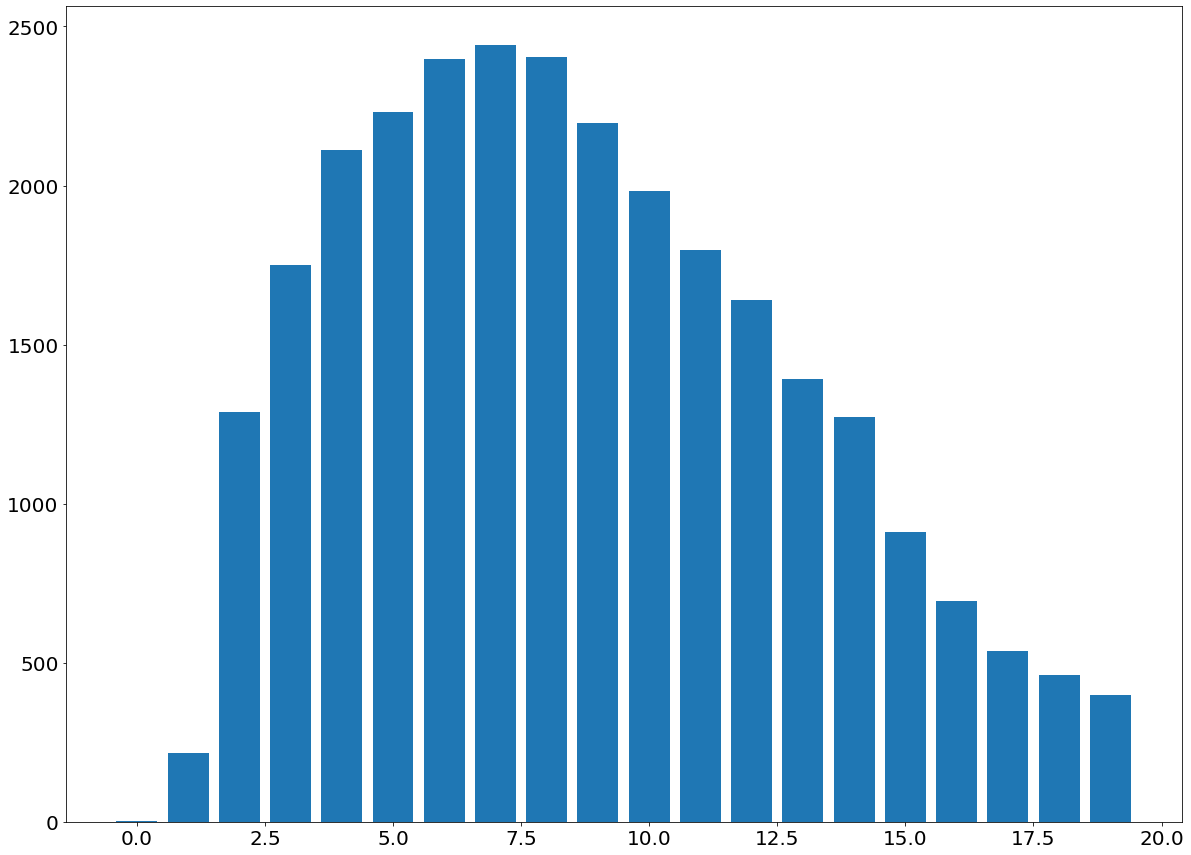

In [85]:
# define fig style
plt.rc('font', size=20)
fig = plt.figure(figsize=(20,15), facecolor='white')
ax = fig.add_subplot(1, 1, 1)

plt.bar(range(0,20), wanthave_bins)
plt.show()

In [51]:
print(len(wanthave_timings))

38069


In [95]:
wantblock_timings = []

n_bins = 20
wantblock_bins = [0 for _ in range(n_bins)]

for cid in sreqs:
    start_time = bsreqs[cid]['start']
    if MESSAGES[WANT_BLOCK_POS] in reqs[cid]:
        for peerid in sreqs[cid][MESSAGES[WANT_BLOCK_POS]]:
            for timestamp in sreqs[cid][MESSAGES[WANT_BLOCK_POS]][peerid]:
                diff = (timestamp - start_time).total_seconds() * 1000
                if diff < 20:
                    wantblock_bins[int(diff)] += 1
                wantblock_timings.append(diff)
print(wantblock_bins)


[0, 3, 9, 16, 21, 30, 29, 20, 25, 13, 25, 31, 15, 14, 12, 9, 8, 6, 8, 3]


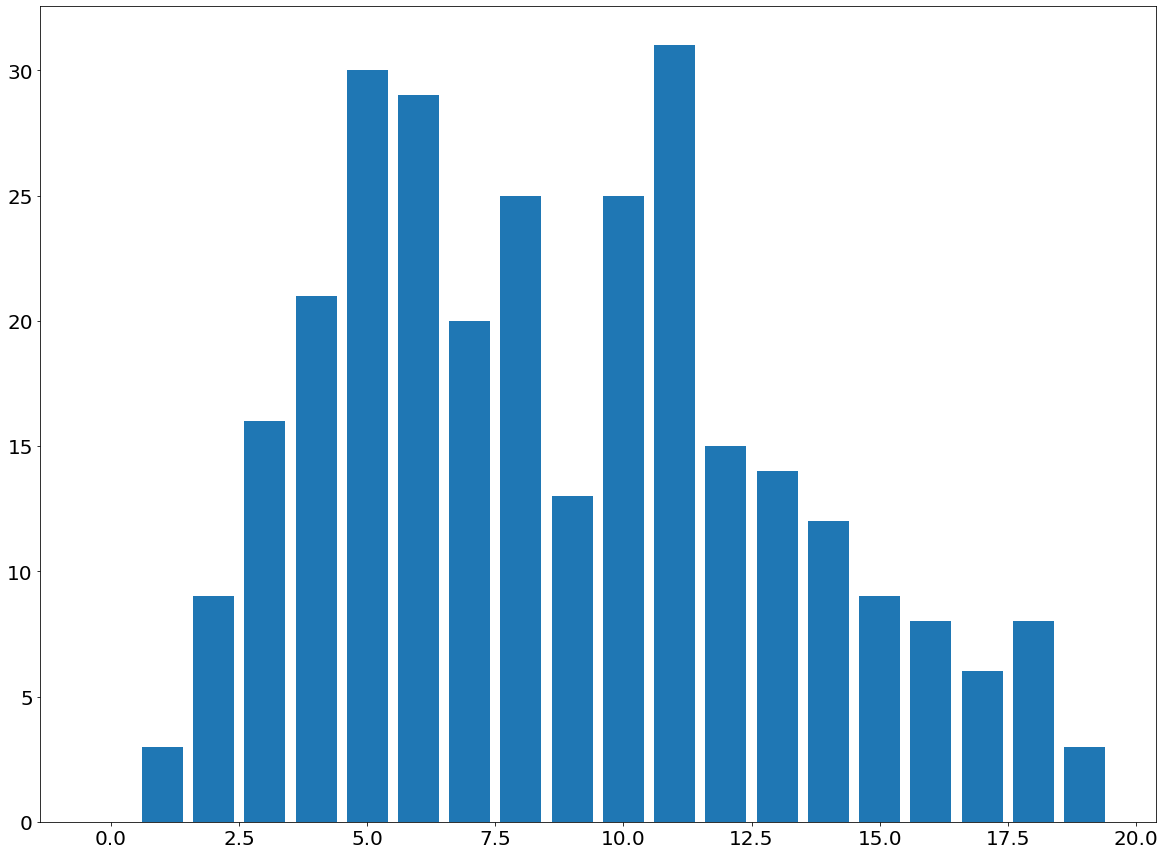

In [96]:
# define fig style
plt.rc('font', size=20)
fig = plt.figure(figsize=(20,15), facecolor='white')
ax = fig.add_subplot(1, 1, 1)

plt.bar(range(0,20), wantblock_bins)
plt.show()

In [102]:
block_timings = []

n_bins = 20
block_bins = [0 for _ in range(n_bins)]

for cid in sreqs:
    start_time = bsreqs[cid]['start']
    if MESSAGES[BLOCK_POS] in reqs[cid]:
        for peerid in reqs[cid][MESSAGES[BLOCK_POS]]:
            for timestamp in reqs[cid][MESSAGES[BLOCK_POS]][peerid]:
                diff = (timestamp - start_time).total_seconds() * 100
                if diff < 20:
                    block_bins[int(diff)] += 1
                block_timings.append(diff)
print(block_bins)


[0, 2, 5, 4, 10, 6, 7, 4, 1, 5, 6, 2, 0, 1, 1, 0, 1, 1, 1, 1]


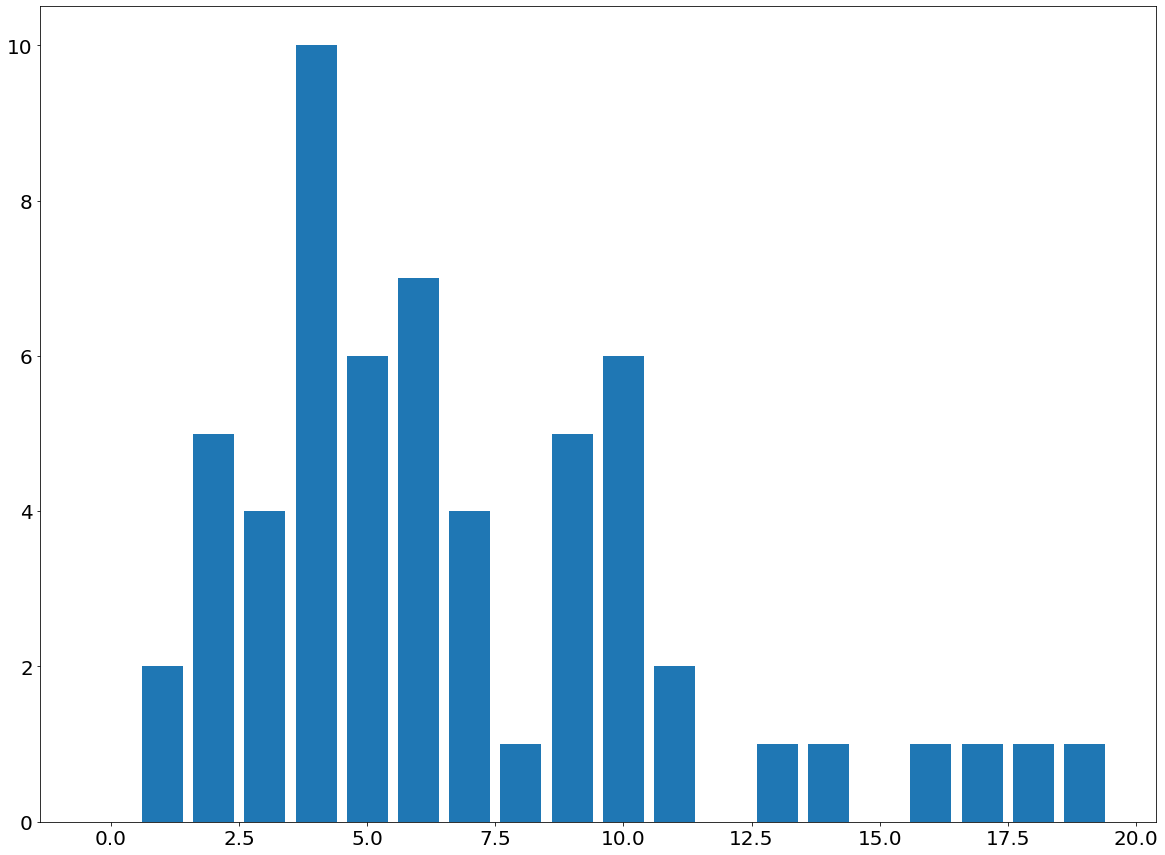

In [103]:
# define fig style
plt.rc('font', size=20)
fig = plt.figure(figsize=(20,15), facecolor='white')
ax = fig.add_subplot(1, 1, 1)

plt.bar(range(0,20), block_bins)
plt.show()